In [141]:
!pip install scikit-learn==1.2.2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [142]:
data= pd.read_csv("C:/Users/JISNA/Downloads/fraud_detection.csv")

In [143]:
data

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,1,1,0,1,1,0,Laborers,1.0,2,2
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,1,1,0,1,1,0,Core staff,2.0,1,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,1,1,1,1,1,0,Laborers,1.0,2,2
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,1,1,0,1,0,0,Laborers,2.0,2,2
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,1,1,0,1,0,0,Core staff,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,...,1,1,0,1,0,0,Sales staff,1.0,1,1
307507,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,1,0,0,1,1,0,NaN,1.0,2,2
307508,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,...,1,1,0,1,0,1,Managers,1.0,3,3
307509,307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,...,1,1,0,1,0,0,Laborers,2.0,2,2


In [144]:
data.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,...,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000
mean,153755.000000,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,...,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521
std,88770.923652,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,...,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737
min,0.000000,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,76877.500000,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,...,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,153755.000000,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,...,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
75%,230632.500000,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,...,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,307510.000000,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,...,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000


In [145]:
object_cols = data.select_dtypes(include=['object'])
numeric_cols = data.select_dtypes(include=['int64', 'float64']).iloc[:, :13]

# Concatenate both selections
selected_columns = pd.concat([object_cols, numeric_cols], axis=1)

# Slice the DataFrame using the selected columns
datas = data[selected_columns.columns]

datas

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,...,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,...,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,...,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,...,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931


In [146]:
description = data.describe(include='all')
description

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000
unique,NaN,NaN,NaN,2,3,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN
top,NaN,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN
freq,NaN,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN
mean,153755.000000,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,...,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521
std,88770.923652,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,...,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,NaN,0.910682,0.509034,0.502737
min,0.000000,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000
25%,76877.500000,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,2.000000,2.000000
50%,153755.000000,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,2.000000,2.000000
75%,230632.500000,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,NaN,3.000000,2.000000,2.000000


In [147]:
datas.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
OCCUPATION_TYPE                object
Unnamed: 0                      int64
SK_ID_CURR                      int64
TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
dtype: object

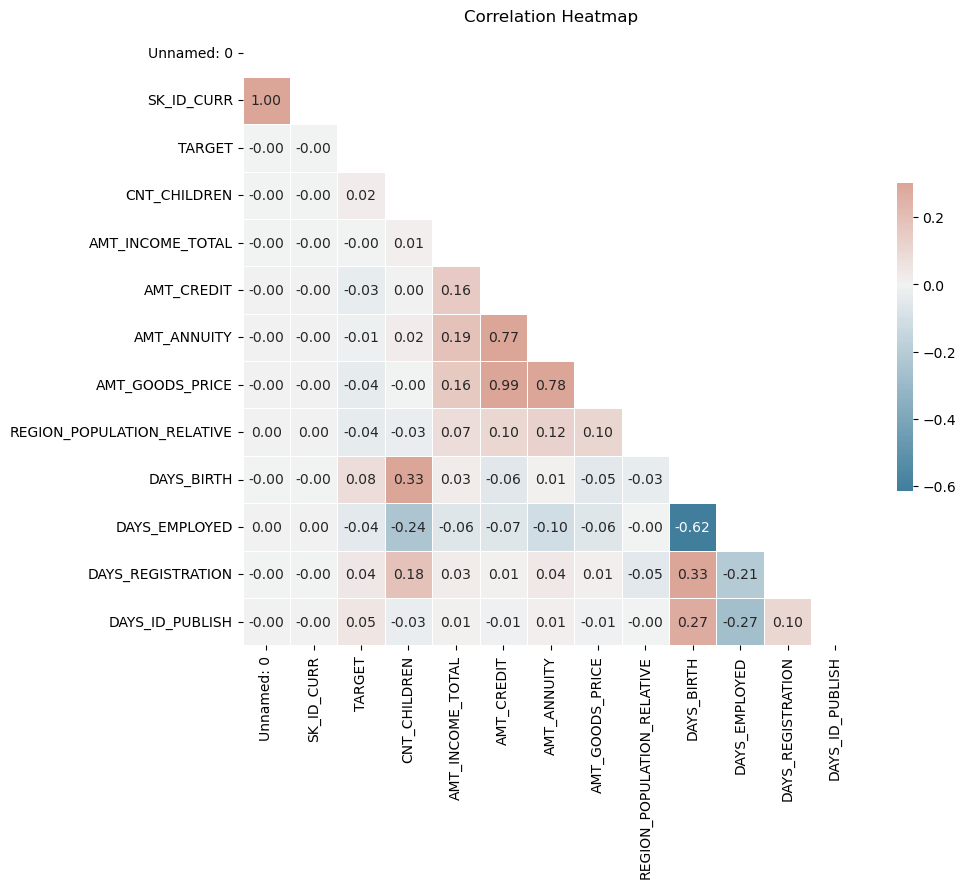

In [148]:
corr = datas.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8),dpi=100)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Heatmap', size=12)

plt.show()

In [149]:
#To get the interaction effect amount of children and days employed are multiplied.
def create_new_feature(row):
    new_feature_value = row['AMT_INCOME_TOTAL'] * row['DAYS_EMPLOYED']
    return new_feature_value

# Apply the function to create the new feature for each row in the DataFrame
datas.loc[:, 'income*days_employed'] = data.apply(create_new_feature, axis=1)



C:\Users\JISNA\AppData\Local\Temp\ipykernel_20500\1654122671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.loc[:, 'income*days_employed'] = data.apply(create_new_feature, axis=1)


In [150]:
#To check both days registration and count of children together influences the target or not..
def create_new_feature(row):
    new_feature = row['DAYS_REGISTRATION'] * row['CNT_CHILDREN']
    return new_feature
# Apply the function to create the new feature for each row in the DataFrame
datas.loc[:, 'DAYS_REGISTRATION*CNT_CHILDREN'] = data.apply(create_new_feature, axis=1)

C:\Users\JISNA\AppData\Local\Temp\ipykernel_20500\1032021726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.loc[:, 'DAYS_REGISTRATION*CNT_CHILDREN'] = data.apply(create_new_feature, axis=1)


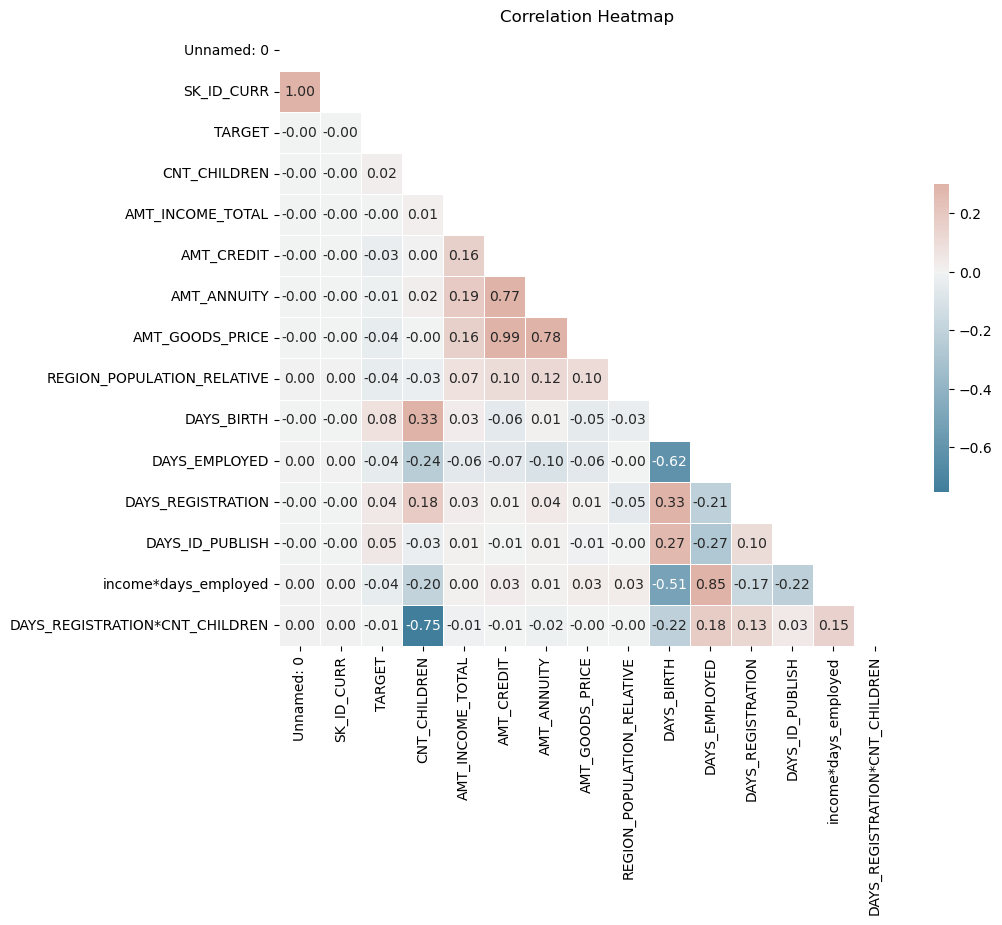

In [151]:
corr = datas.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8),dpi=100)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Heatmap', size=12)

plt.show()

In [152]:
#To check both Region population relation and day employed together influences the target or not..
def create_new_feature(row):
    new_feature = row['REGION_POPULATION_RELATIVE'] * row['DAYS_EMPLOYED']
    return new_feature
# Apply the function to create the new feature for each row in the DataFrame
datas.loc[:, 'REGION_POPULATION_RELATIVE*DAYS_EMPLOYED'] = datas.apply(create_new_feature, axis=1)

C:\Users\JISNA\AppData\Local\Temp\ipykernel_20500\1929975460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.loc[:, 'REGION_POPULATION_RELATIVE*DAYS_EMPLOYED'] = datas.apply(create_new_feature, axis=1)


In [153]:
datas.shape

(307511, 26)

In [154]:
#To check by squaring amount credit will influences the target or not..
def square_column_value(x):
    return x ** 2

# Apply the function to create the new feature for each value in the column
datas['AMT_CREDIT_SQUARED'] = datas['AMT_CREDIT'].apply(square_column_value)

C:\Users\JISNA\AppData\Local\Temp\ipykernel_20500\2615467319.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['AMT_CREDIT_SQUARED'] = datas['AMT_CREDIT'].apply(square_column_value)


In [155]:
datas.shape

(307511, 27)

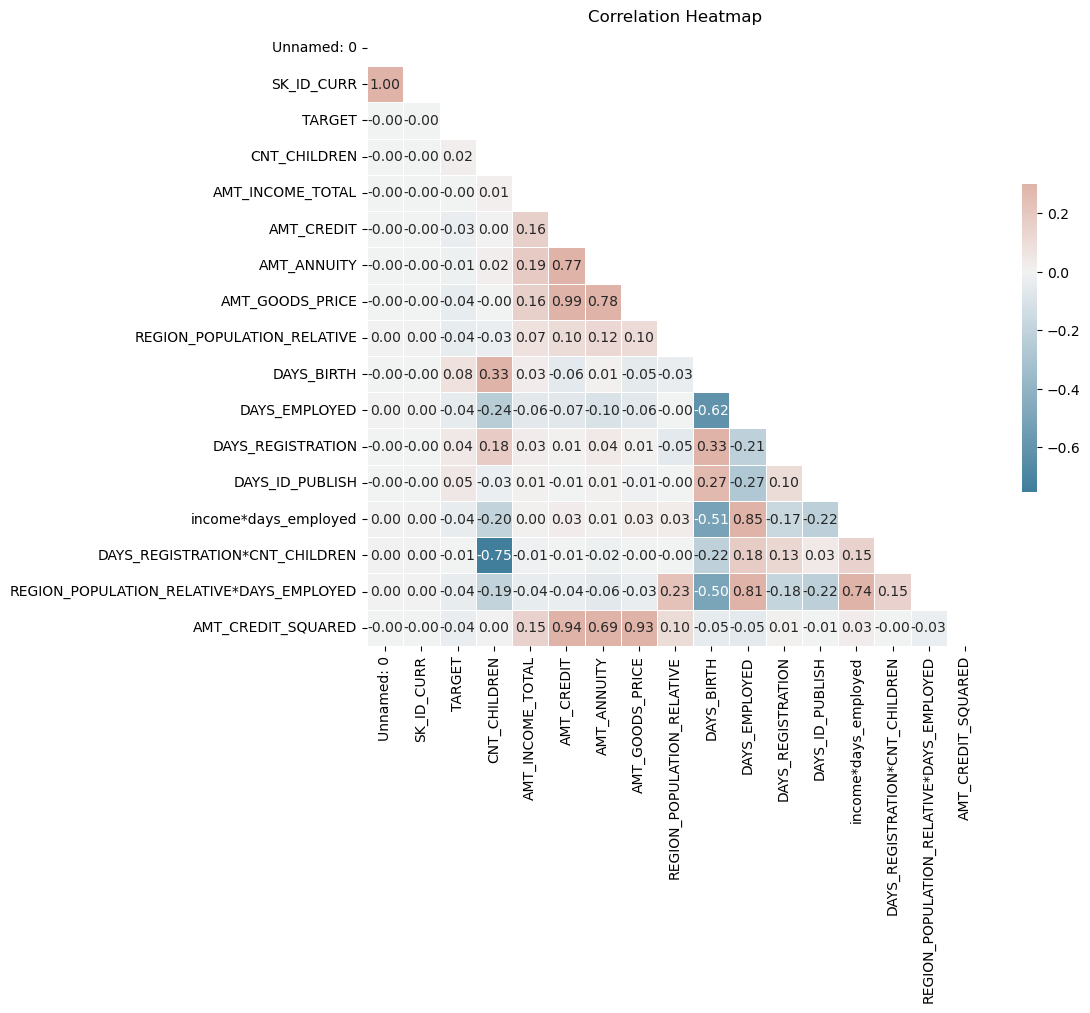

In [156]:
corr = datas.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8),dpi=100)

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Heatmap', size=12)

plt.show()